In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from hydra import compose, initialize
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity

from sneakers_ml.features.resnet152 import ResNet152Features

warnings.filterwarnings("ignore")

with initialize(version_base=None, config_path="config", job_name="resnet-eda"):
    cfg = compose(config_name="config")
    features_class = ResNet152Features(cfg.features.resnet152.config, cfg.data)

In [ ]:
features, classes, class_to_idx = features_class._load_features(features_class.config.splits.full)

idx_to_class = {v: k for k, v in class_to_idx.items()}
# classes_idx = classes[:, 1]
# images_idx = classes[:, 0]

In [ ]:
similarity_matrix = cosine_similarity(features)
threshold = 0.99
paths = list(classes[:, 0])

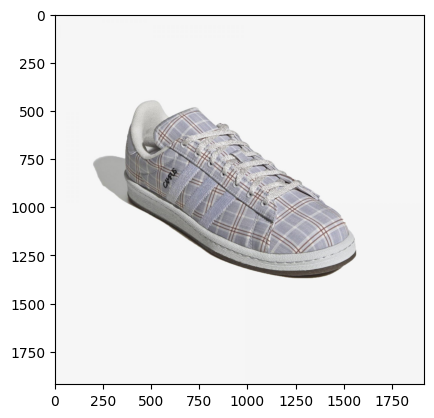

In [ ]:
image = Image.open("data/training/brands-classification/full/adidas/102.jpeg")
plt.imshow(image)

In [ ]:
def get_similar_brands(image):
    image_feature = features_class._get_feature(image)
    similarity_matrix = cosine_similarity(features, image_feature).flatten()
    similar_indices = np.argwhere(similarity_matrix > threshold)
    path, class_ = classes[similar_indices[0]][0]
    return Image.open(path), idx_to_class[int(class_)]

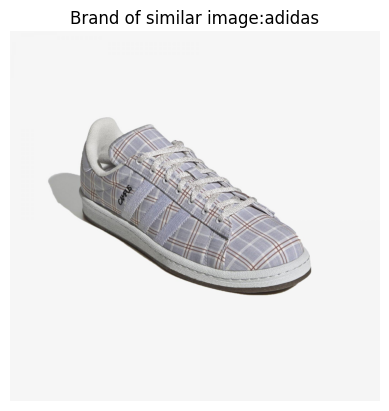

In [ ]:
similar_image, brand = get_similar_brands(image)
plt.imshow(similar_image)
plt.title(f"Brand of similar image:{brand}")
plt.axis("off")
plt.show()